In [7]:
import sys
import os

from notscared import snr
from notscared import cpa
from notscared.data import trace_handler as trace_handler
from notscared.converters import Converter
import zarr
import time
import matplotlib.pyplot as plt
import numpy as np

# Benchmark compression level vs file size
***

Test compression levels 1-9 vs file size. Compare it to file size

In [27]:
file_sizes = []
file_paths = []
clevels = []

converter = Converter()
db_file = '1x1x100000_r1_singlerail5_sr_ise.db'
cwd = os.getcwd()
db_file = os.path.join(cwd, db_file)
print(db_file)

c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise.db


In [28]:
for clevel in range(1, 10):
    compressor = zarr.Blosc(cname='zstd', clevel=clevel, shuffle=zarr.Blosc.SHUFFLE)
    converter.db_to_zarr(db_file,
                         'traces',
                         output_columns=['samples', 'ptxt', 'tile_x', 'tile_y'],
                         chunk_size=10000,
                         compressor=compressor)
    
    old_zarr_file = db_file.replace('.db', '.zarr')
    new_zarr_file = f'{db_file[:-3]}_zstd_{clevel}.zarr'
    os.replace(old_zarr_file, new_zarr_file)
    zarr_file_size = Converter.get_directory_size(new_zarr_file)
    file_sizes.append(zarr_file_size)
    file_paths.append(new_zarr_file)
    clevels.append(clevel)

Converting database to Zarr: 100%|██████████| 10/10 [08:09<00:00, 48.93s/it]


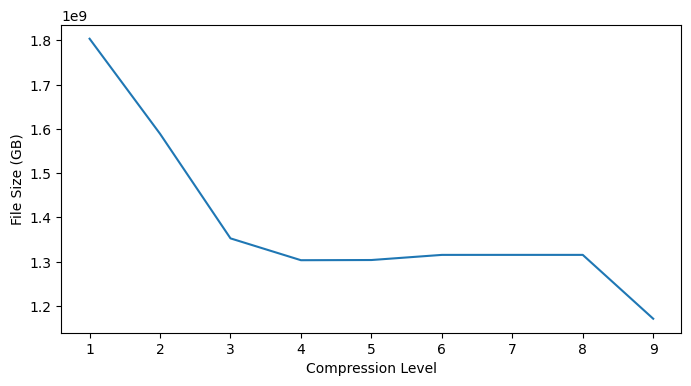

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))

# Create a plot
plt.plot(clevels, file_sizes)
plt.ylabel("File Size (GB)")
plt.xlabel("Compression Level")
plt.show()

# Benchmark compression level vs basic SNR calculation speed
***

In [30]:
file_times = []
clevels = []

for clevel in range(1, 10):
    zarr_file = f'1x1x100000_r1_singlerail5_sr_ise_zstd_{clevel}.zarr'
    proj_root = os.getcwd()
    filename = os.path.join(proj_root, zarr_file)
    
    th = trace_handler.TraceHandler(fileName=filename, 
                                    batchSize=5000, 
                                    batchStart=75001,  # in '1x1x100000_r1_singlerail5_sr_ise.zarr' you should use a batchStart of 75001
                                    tiles_coordinates=[])
    
    snrresults = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    snrresults.run()
    stop = time.perf_counter()
    file_times.append(stop - start)
    clevels.append(clevel)

opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_1.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_2.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_3.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_4.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerai

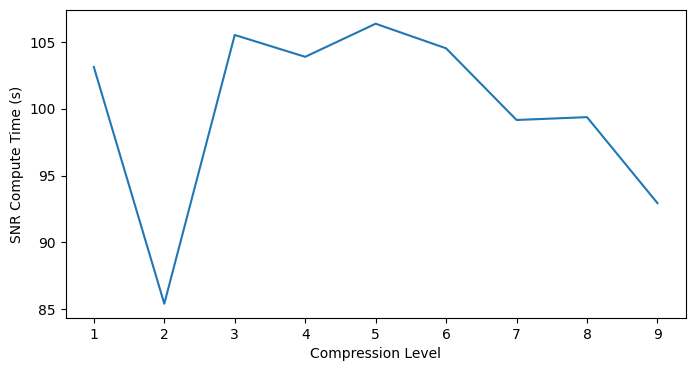

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.plot(clevels, file_times)
plt.ylabel("SNR Compute Time (s)")
plt.xlabel("Compression Level")
plt.show()

# Benchmark compression level vs advanced SNR calculation speed
***

In [4]:
file_times = []
clevels = []

for clevel in range(1, 10):
    zarr_file = f'1x1x100000_r1_singlerail5_sr_ise_zstd_{clevel}.zarr'
    proj_root = os.getcwd()
    filename = os.path.join(proj_root, zarr_file)
    
    th = trace_handler.TraceHandler(fileName=filename, 
                                    batchSize=5000, 
                                    batchStart=75001,  # in '1x1x100000_r1_singlerail5_sr_ise.zarr' you should use a batchStart of 75001
                                    tiles_coordinates=[],
                                    time_slice=[0, 10000],
                                    trace_step=5)
    
    snrresults = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    snrresults.run()
    stop = time.perf_counter()
    file_times.append(stop - start)
    clevels.append(clevel)

opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_1.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_2.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_3.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_4.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerai

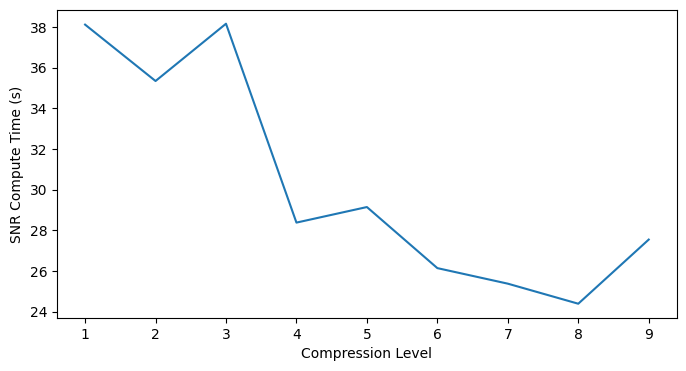

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.plot(clevels, file_times)
plt.ylabel("SNR Compute Time (s)")
plt.xlabel("Compression Level")
plt.show()

# Benchmark compression level vs basic CPA calculation speed
***

In [9]:
file_times = []
clevels = []

for clevel in range(1, 10):
    zarr_file = f'1x1x100000_r1_singlerail5_sr_ise_zstd_{clevel}.zarr'
    proj_root = os.getcwd()
    filename = os.path.join(proj_root, zarr_file)
    
    th = trace_handler.TraceHandler(fileName=filename, 
                                    batchSize=5000, 
                                    batchStart=75001,  # in '1x1x100000_r1_singlerail5_sr_ise.zarr' you should use a batchStart of 75001
                                    tiles_coordinates=[])
    
    cparesults = cpa.CPA(Tracehandler=th, Bytes=[0,1])
    start = time.perf_counter()
    cparesults.run()
    stop = time.perf_counter()
    file_times.append(stop - start)
    clevels.append(clevel)

opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_1.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_2.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_3.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_4.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_5.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_6.

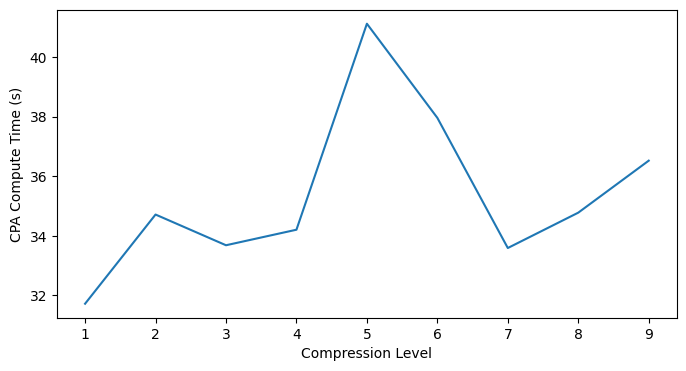

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.plot(clevels, file_times)
plt.ylabel("CPA Compute Time (s)")
plt.xlabel("Compression Level")
plt.show()

# Benchmark compression level vs advanced CPA calculation speed
***

In [11]:
file_times = []
clevels = []

for clevel in range(1, 10):
    zarr_file = f'1x1x100000_r1_singlerail5_sr_ise_zstd_{clevel}.zarr'
    proj_root = os.getcwd()
    filename = os.path.join(proj_root, zarr_file)
    
    th = trace_handler.TraceHandler(fileName=filename, 
                                    batchSize=5000, 
                                    batchStart=75001,  # in '1x1x100000_r1_singlerail5_sr_ise.zarr' you should use a batchStart of 75001
                                    tiles_coordinates=[],
                                    time_slice=[0, 10000],
                                    trace_step=5)
    
    cparesults = cpa.CPA(Tracehandler=th, Bytes=[0,1])
    start = time.perf_counter()
    cparesults.run()
    stop = time.perf_counter()
    file_times.append(stop - start)
    clevels.append(clevel)

opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_1.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_2.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_3.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_4.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_5.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1]
opened zarr file  c:\Users\mjmey\OneDrive\Documents\Capstone\notscared2\benchmarking\1x1x100000_r1_singlerail5_sr_ise_zstd_6.

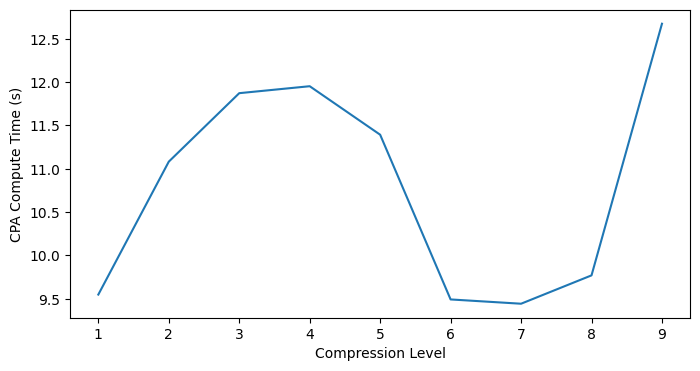

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.plot(clevels, file_times)
plt.ylabel("CPA Compute Time (s)")
plt.xlabel("Compression Level")
plt.show()